In [28]:
# Built-in
import os
import warnings
warnings.filterwarnings('ignore')

# Data
import numpy as np
import pandas as pd
import missingno as msno
from collections import defaultdict

#Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from PIL import Image
import time
# NLP
import nltk 
from nltk.stem.snowball import EnglishStemmer
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.tokenize import word_tokenize, wordpunct_tokenize, RegexpTokenizer
from nltk.probability import FreqDist


from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.corpus import words, stopwords
import spacy
import re
from transformers import TFAutoModel, AutoTokenizer
import tensorflow_hub as hub
#cluster
from sklearn.cluster import AgglomerativeClustering, KMeans,MiniBatchKMeans, DBSCAN,MeanShift,SpectralClustering,Birch
from scipy.cluster.hierarchy import fcluster, dendrogram, linkage
from sklearn.decomposition import PCA

#metrics
from sklearn.metrics import (mean_squared_error, silhouette_samples,silhouette_score,davies_bouldin_score,
                             adjusted_rand_score,adjusted_mutual_info_score,pair_confusion_matrix)

from sklearn import cluster, manifold, metrics



from pandarallel import pandarallel

#image

from os import listdir
import os
from matplotlib import pyplot as plt
from skimage.io import imread
from skimage.transform import resize


In [2]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('words')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\imane.elhabachi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\imane.elhabachi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\imane.elhabachi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\imane.elhabachi\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\imane.elhabachi\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

**nltk.download('punkt')** télécharge le tokenizer Punkt, qui est un tokenizer non supervisé pré-entraîné qui divise le texte en une liste de jetons de phrases.
**nltk.download('stopwords')** télécharge une collection de stopwords, qui sont des mots couramment utilisés qui sont souvent supprimés du texte lors du prétraitement.
**nltk.download('wordnet')** télécharge la base de données lexicale WordNet, qui contient des informations sur les significations des mots, les synonymes, les antonymes, etc.
**nltk.download('words')** télécharge une liste de mots, qui peut être utilisée pour des tâches telles que la vérification orthographique ou l'identification de la langue.
**nltk.download('omw-1.4')** télécharge l'Open Multilingual WordNet, qui est une base de données lexicale multilingue qui contient des wordnets pour plusieurs langues.

In [2]:
# La cpu_count méthode est utilisée pour renvoyer le nombre actuel de CPU logiques dans le système.
import psutil
print("The number of physical cores in the system is %s" % (psutil.cpu_count(logical=False),))
print("The number of logical cores in the system is %s" % (psutil.cpu_count(logical=True),))

The number of physical cores in the system is 10
The number of logical cores in the system is 12


# importation et verification des donnees 

In [3]:
data = pd.read_csv(f'flipkart_com-ecommerce_sample_1050.csv')
data.shape

(1050, 15)

In [4]:
data.head(2).T

,0,1
uniq_id,55b85ea15a1536d46b7190ad6fff8ce7,7b72c92c2f6c40268628ec5f14c6d590
crawl_timestamp,2016-04-30 03:22:56 +0000,2016-04-30 03:22:56 +0000
product_url,http://www.flipkart.com/elegance-polyester-mul...,http://www.flipkart.com/sathiyas-cotton-bath-t...
product_name,Elegance Polyester Multicolor Abstract Eyelet ...,Sathiyas Cotton Bath Towel
product_category_tree,"[""Home Furnishing >> Curtains & Accessories >>...","[""Baby Care >> Baby Bath & Skin >> Baby Bath T..."
pid,CRNEG7BKMFFYHQ8Z,BTWEGFZHGBXPHZUH
retail_price,1899.0,600.0
discounted_price,899.0,449.0
image,55b85ea15a1536d46b7190ad6fff8ce7.jpg,7b72c92c2f6c40268628ec5f14c6d590.jpg
is_FK_Advantage_product,False,False


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  1050 non-null   object 
 1   crawl_timestamp          1050 non-null   object 
 2   product_url              1050 non-null   object 
 3   product_name             1050 non-null   object 
 4   product_category_tree    1050 non-null   object 
 5   pid                      1050 non-null   object 
 6   retail_price             1049 non-null   float64
 7   discounted_price         1049 non-null   float64
 8   image                    1050 non-null   object 
 9   is_FK_Advantage_product  1050 non-null   bool   
 10  description              1050 non-null   object 
 11  product_rating           1050 non-null   object 
 12  overall_rating           1050 non-null   object 
 13  brand                    712 non-null    object 
 14  product_specifications  

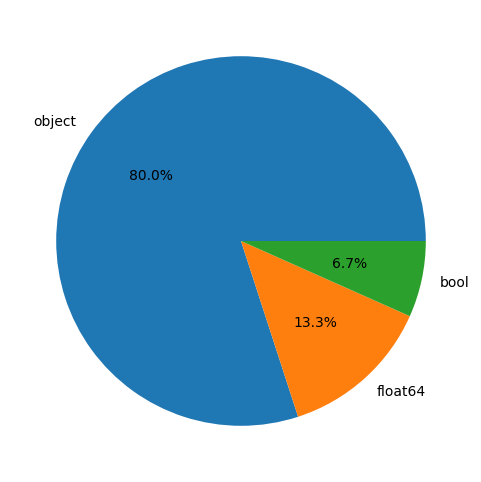

In [6]:

labels = ["object", "float64", "bool"]
fig, ax = plt.subplots(1,1, figsize = (20, 6))
ax.pie(data.dtypes.value_counts(normalize=True), labels=labels, autopct='%1.1f%%')
del labels;



In [7]:
data.nunique()

uniq_id                    1050
crawl_timestamp             149
product_url                1050
product_name               1050
product_category_tree       642
pid                        1050
retail_price                354
discounted_price            424
image                      1050
is_FK_Advantage_product       2
description                1050
product_rating               27
overall_rating               27
brand                       490
product_specifications      984
dtype: int64

In [8]:
data.duplicated().sum()

0

In [9]:
data.describe(include='all')

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
count,1050,1050,1050,1050,1050,1050,1049.000000,1049.000000,1050,1050,1050,1050,1050,712,1049
unique,1050,149,1050,1050,642,1050,NaN,NaN,1050,2,1050,27,27,490,984
top,55b85ea15a1536d46b7190ad6fff8ce7,2015-12-01 12:40:44 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Bed Linen >> Blankets, Qu...",CRNEG7BKMFFYHQ8Z,NaN,NaN,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,PRINT SHAPES,"{""product_specification""=>[{""key""=>""Type"", ""va..."
freq,1,150,1,1,56,1,NaN,NaN,1,993,1,889,889,11,22
mean,NaN,NaN,NaN,NaN,NaN,NaN,2186.197331,1584.527169,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,7639.229411,7475.099680,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,35.000000,35.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,555.000000,340.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,999.000000,600.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,1999.000000,1199.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


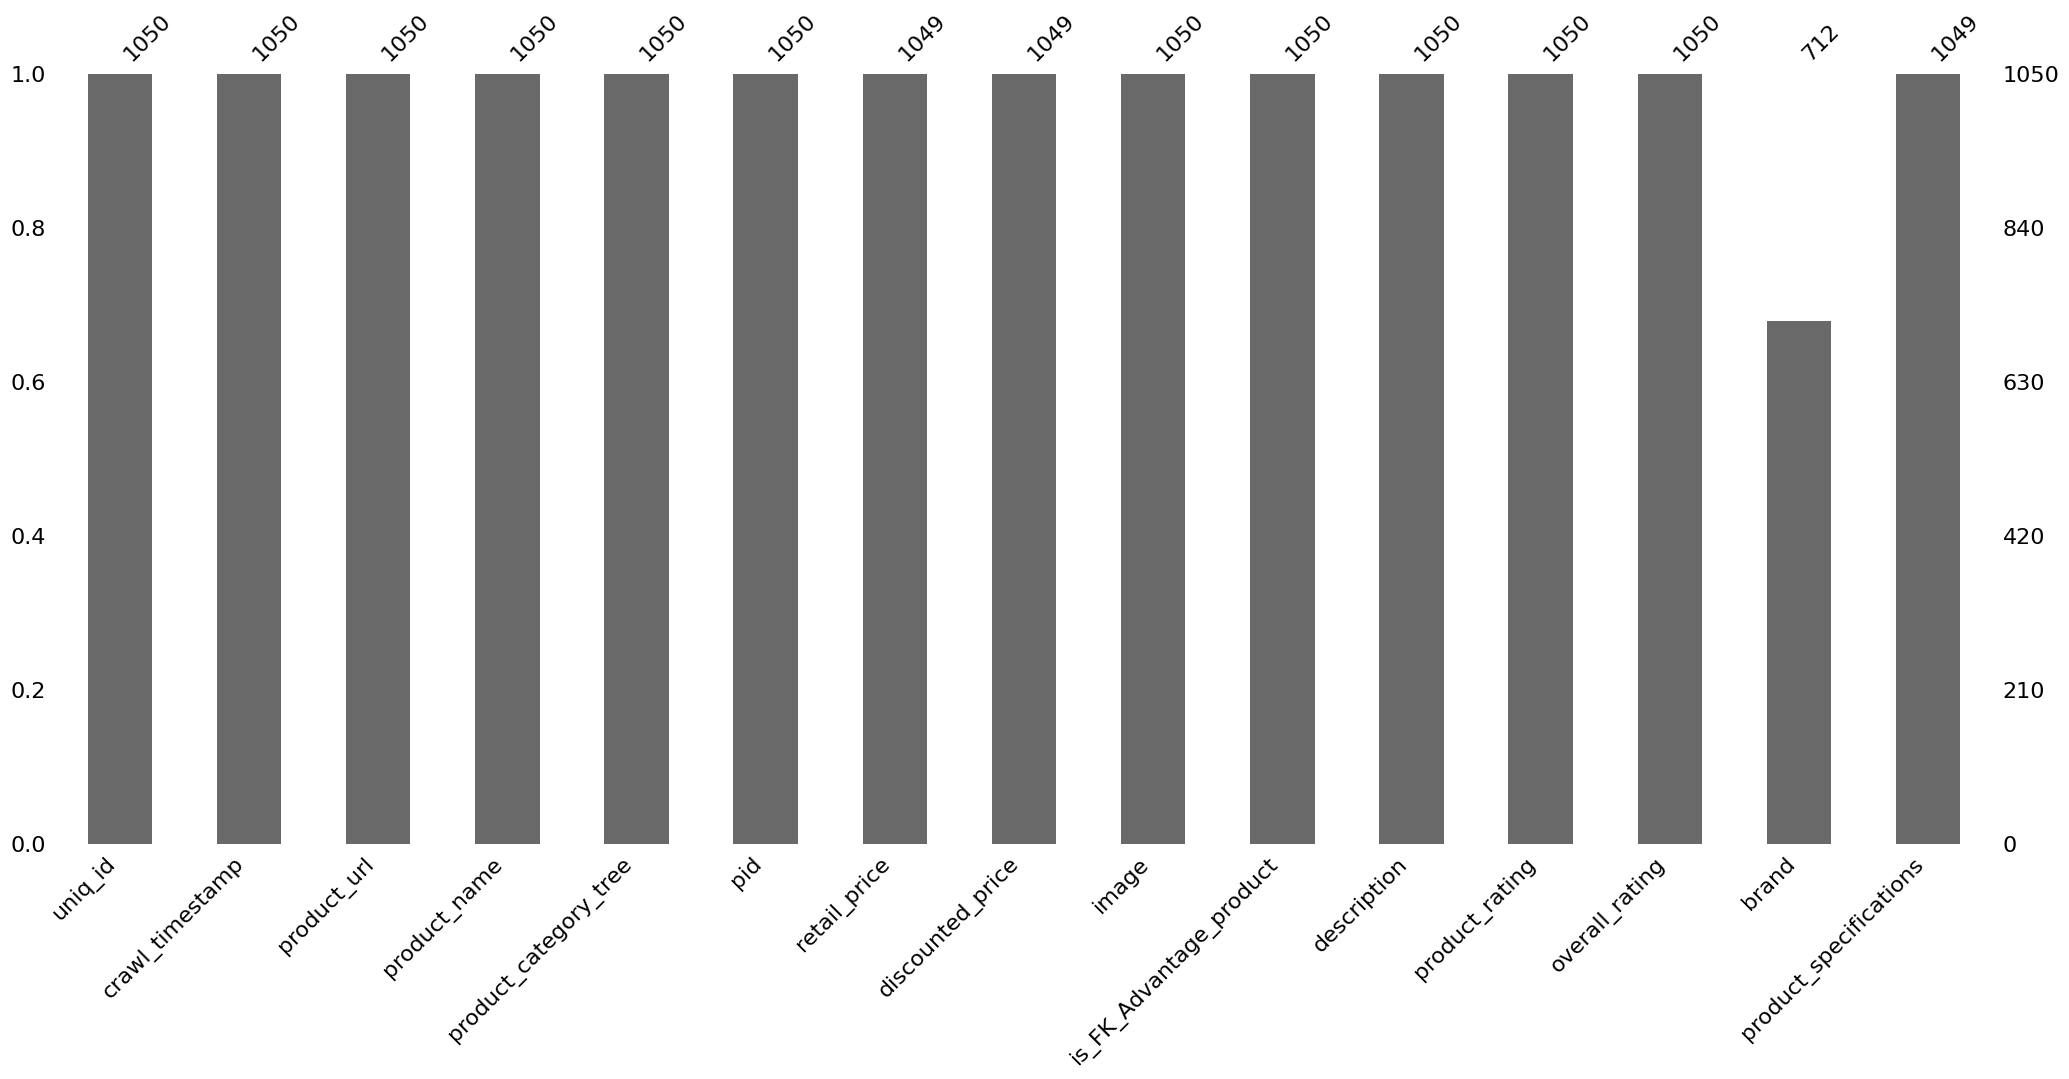

In [10]:
msno.bar(data);

In [11]:
data = data.drop(columns=[
    'crawl_timestamp',
    'product_url',
    'pid',
    'retail_price',
    'discounted_price',
    'is_FK_Advantage_product',
    'product_rating',
    'overall_rating',
    'product_specifications',
    'brand'
])

data.head(3).T

,0,1,2
uniq_id,55b85ea15a1536d46b7190ad6fff8ce7,7b72c92c2f6c40268628ec5f14c6d590,64d5d4a258243731dc7bbb1eef49ad74
product_name,Elegance Polyester Multicolor Abstract Eyelet ...,Sathiyas Cotton Bath Towel,Eurospa Cotton Terry Face Towel Set
product_category_tree,"[""Home Furnishing >> Curtains & Accessories >>...","[""Baby Care >> Baby Bath & Skin >> Baby Bath T...","[""Baby Care >> Baby Bath & Skin >> Baby Bath T..."
image,55b85ea15a1536d46b7190ad6fff8ce7.jpg,7b72c92c2f6c40268628ec5f14c6d590.jpg,64d5d4a258243731dc7bbb1eef49ad74.jpg
description,Key Features of Elegance Polyester Multicolor ...,Specifications of Sathiyas Cotton Bath Towel (...,Key Features of Eurospa Cotton Terry Face Towe...


## Analyse de product_category_tree

In [12]:
data[['product_category_tree']]

,product_category_tree
0,"[""Home Furnishing >> Curtains & Accessories >>..."
1,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T..."
2,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T..."
3,"[""Home Furnishing >> Bed Linen >> Bedsheets >>..."
4,"[""Home Furnishing >> Bed Linen >> Bedsheets >>..."
...,...
1045,"[""Baby Care >> Baby & Kids Gifts >> Stickers >..."
1046,"[""Baby Care >> Baby & Kids Gifts >> Stickers >..."
1047,"[""Baby Care >> Baby & Kids Gifts >> Stickers >..."
1048,"[""Baby Care >> Baby & Kids Gifts >> Stickers >..."


Le séparateur >> indique les différents niveaux de branches des produits.

In [13]:
data['product_category_tree'] = data['product_category_tree'].str.strip('["]')  # enlever les crochets et guillemets
data['product_category_tree'] = data['product_category_tree'].str.split(' >> ')  # diviser les chaînes de caractères

data['categ_1'] = data['product_category_tree'].apply(lambda x: x[0] if len(x) > 0 else None)
data['categ_2'] = data['product_category_tree'].apply(lambda x: x[1] if len(x) > 1 else None)
data['categ_3'] = data['product_category_tree'].apply(lambda x: x[2] if len(x) > 2 else None)

In [14]:
# Utilisez la méthode 'nunique()' pour chaque colonne
nb_unique_categ_1 = data['categ_1'].nunique()
nb_unique_categ_2 = data['categ_2'].nunique()
nb_unique_categ_3 = data['categ_3'].nunique()

print("Nb valeurs uniques 'categ_1':", nb_unique_categ_1)
print("Nb valeurs uniques 'categ_2':", nb_unique_categ_2)
print("Nb valeurs uniques 'categ_3':", nb_unique_categ_3)

Nb valeurs uniques 'categ_1': 7
Nb valeurs uniques 'categ_2': 62
Nb valeurs uniques 'categ_3': 241


In [15]:
data['categ_1'].value_counts()

categ_1
Home Furnishing               150
Baby Care                     150
Watches                       150
Home Decor & Festive Needs    150
Kitchen & Dining              150
Beauty and Personal Care      150
Computers                     150
Name: count, dtype: int64

In [16]:
data['categ_2'].value_counts()

categ_2
Wrist Watches                      149
Laptop Accessories                  87
Infant Wear                         84
Coffee Mugs                         74
Showpieces                          71
                                  ... 
Consumables & Disposables            1
TRUE Home Decor & Festive Needs      1
JMD Home Furnishing                  1
Kripa's Home Furnishing              1
Beauty Accessories                   1
Name: count, Length: 62, dtype: int64

In [17]:
data['categ_3'].value_counts()

categ_3
Deodorants                   65
Blankets, Quilts & Dohars    57
Routers                      49
Baby Girls' Clothes          49
USB Gadgets                  38
                             ..
Portable Projectors           1
Changing Tables               1
Titan Wrist Watches           1
Table Linen Sets              1
Strollers & Prams             1
Name: count, Length: 241, dtype: int64

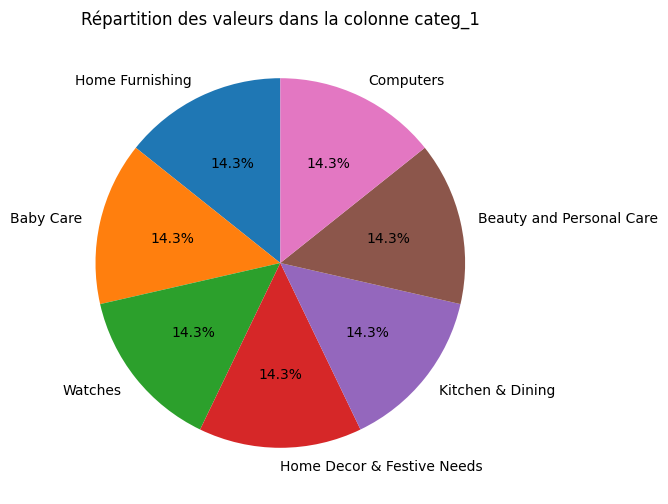

In [18]:
# Calculer le décompte des valeurs uniques dans la colonne 'categ_1'
value_counts = data['categ_1'].value_counts()

# Créer le diagramme en secteurs
plt.figure(figsize=(10, 6))
value_counts.plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Répartition des valeurs dans la colonne categ_1')
plt.ylabel('') 
plt.show()

On constate que pour la catégorie principale des produits ('categ_1'), est parfaitement équilibrée avec 150 produits dans chaque catégorie.

In [19]:
data.to_csv("data.csv")

# Prétraiter des données textes pour obtenir un jeu de données exploitable

## Nettoyer les champs de texte (ponctuation/mots de liaison/mise en minuscules)

In [20]:
#  product name, description et brand en une nouvelle feature
data['descriptions'] = data['product_name'] + \
    ' ' + data['description']
corpus = data['descriptions'].str.cat(sep=' ')

In [21]:
data['descriptions'].iloc[0]

'Elegance Polyester Multicolor Abstract Eyelet Door Curtain Key Features of Elegance Polyester Multicolor Abstract Eyelet Door Curtain Floral Curtain,Elegance Polyester Multicolor Abstract Eyelet Door Curtain (213 cm in Height, Pack of 2) Price: Rs. 899 This curtain enhances the look of the interiors.This curtain is made from 100% high quality polyester fabric.It features an eyelet style stitch with Metal Ring.It makes the room environment romantic and loving.This curtain is ant- wrinkle and anti shrinkage and have elegant apparance.Give your home a bright and modernistic appeal with these designs. The surreal attention is sure to steal hearts. These contemporary eyelet and valance curtains slide smoothly so when you draw them apart first thing in the morning to welcome the bright sun rays you want to wish good morning to the whole world and when you draw them close in the evening, you create the most special moments of joyous beauty given by the soothing prints. Bring home the elegant

Nous élaborons une liste d stopwords qui exclut les mots très fréquents en anglais et la ponctuation, qui, bien que courants, n’ajoutent pas de sens informatif à un document.

In [22]:
# Tokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize

def tokenizer_fct(sentence):
    # print(sentence)
    sentence_clean = sentence.replace(
        '-', ' ').replace('+', ' ').replace('/', ' ').replace('#', ' ')
    word_tokens = word_tokenize(sentence_clean)
    return word_tokens


# Stop words
stop_w = list(set(stopwords.words('english'))) + \
    ['[', ']', ',', '.', ':', '?', '(', ')']


def stop_word_filter_fct(list_words):
    filtered_w = [w for w in list_words if not w in stop_w]
    filtered_w2 = [w for w in filtered_w if len(w) > 2]
    return filtered_w2

# lower case et alpha


def lower_start_fct(list_words):
    lw = [w.lower() for w in list_words if (not w.startswith("@"))
          #                                   and (not w.startswith("#"))
          and (not w.startswith("http"))]
    return lw


# Lemmatizer (base d'un mot)


def lemma_fct(list_words):
    lemmatizer = WordNetLemmatizer()
    lem_w = [lemmatizer.lemmatize(w) for w in list_words]
    return lem_w

# Fonction de préparation du texte pour le bag of words (Countvectorizer et Tf_idf, Word2Vec)


def transform_bow_fct(desc_text):
    word_tokens = tokenizer_fct(desc_text)
    sw = stop_word_filter_fct(word_tokens)
    lw = lower_start_fct(sw)
    # lem_w = lemma_fct(lw)
    transf_desc_text = ' '.join(lw)
    return transf_desc_text

# Fonction de préparation du texte pour le bag of words avec lemmatization


def transform_bow_lem_fct(desc_text):
    word_tokens = tokenizer_fct(desc_text)
    sw = stop_word_filter_fct(word_tokens)
    lw = lower_start_fct(sw)
    lem_w = lemma_fct(lw)
    transf_desc_text = ' '.join(lem_w)
    return transf_desc_text

# Fonction de préparation du texte pour le Deep learning (USE et BERT)


def transform_dl_fct(desc_text):
    word_tokens = tokenizer_fct(desc_text)
    # sw = stop_word_filter_fct(word_tokens)
    lw = lower_start_fct(word_tokens)
    # lem_w = lemma_fct(lw)
    transf_desc_text = ' '.join(lw)
    return transf_desc_text


data['sentence_bow'] = data['descriptions'].apply(
    lambda x: transform_bow_fct(x))
data['sentence_bow_lem'] = data['descriptions'].apply(
    lambda x: transform_bow_lem_fct(x))
data['sentence_dl'] = data['descriptions'].apply(lambda x: transform_dl_fct(x))
data.shape

(1050, 12)

In [23]:
data['sentence_bow'].iloc[0]

'elegance polyester multicolor abstract eyelet door curtain key features elegance polyester multicolor abstract eyelet door curtain floral curtain elegance polyester multicolor abstract eyelet door curtain 213 height pack price 899 this curtain enhances look interiors.this curtain made 100 high quality polyester fabric.it features eyelet style stitch metal ring.it makes room environment romantic loving.this curtain ant wrinkle anti shrinkage elegant apparance.give home bright modernistic appeal designs the surreal attention sure steal hearts these contemporary eyelet valance curtains slide smoothly draw apart first thing morning welcome bright sun rays want wish good morning whole world draw close evening create special moments joyous beauty given soothing prints bring home elegant curtain softly filters light room get right amount sunlight. specifications elegance polyester multicolor abstract eyelet door curtain 213 height pack general brand elegance designed for door type eyelet mod

In [24]:
data['sentence_bow_lem'].iloc[0]

'elegance polyester multicolor abstract eyelet door curtain key feature elegance polyester multicolor abstract eyelet door curtain floral curtain elegance polyester multicolor abstract eyelet door curtain 213 height pack price 899 this curtain enhances look interiors.this curtain made 100 high quality polyester fabric.it feature eyelet style stitch metal ring.it make room environment romantic loving.this curtain ant wrinkle anti shrinkage elegant apparance.give home bright modernistic appeal design the surreal attention sure steal heart these contemporary eyelet valance curtain slide smoothly draw apart first thing morning welcome bright sun ray want wish good morning whole world draw close evening create special moment joyous beauty given soothing print bring home elegant curtain softly filter light room get right amount sunlight. specification elegance polyester multicolor abstract eyelet door curtain 213 height pack general brand elegance designed for door type eyelet model name abs

In [25]:
data['sentence_dl'].iloc[0]

'elegance polyester multicolor abstract eyelet door curtain key features of elegance polyester multicolor abstract eyelet door curtain floral curtain , elegance polyester multicolor abstract eyelet door curtain ( 213 cm in height , pack of 2 ) price : rs . 899 this curtain enhances the look of the interiors.this curtain is made from 100 % high quality polyester fabric.it features an eyelet style stitch with metal ring.it makes the room environment romantic and loving.this curtain is ant wrinkle and anti shrinkage and have elegant apparance.give your home a bright and modernistic appeal with these designs . the surreal attention is sure to steal hearts . these contemporary eyelet and valance curtains slide smoothly so when you draw them apart first thing in the morning to welcome the bright sun rays you want to wish good morning to the whole world and when you draw them close in the evening , you create the most special moments of joyous beauty given by the soothing prints . bring home 

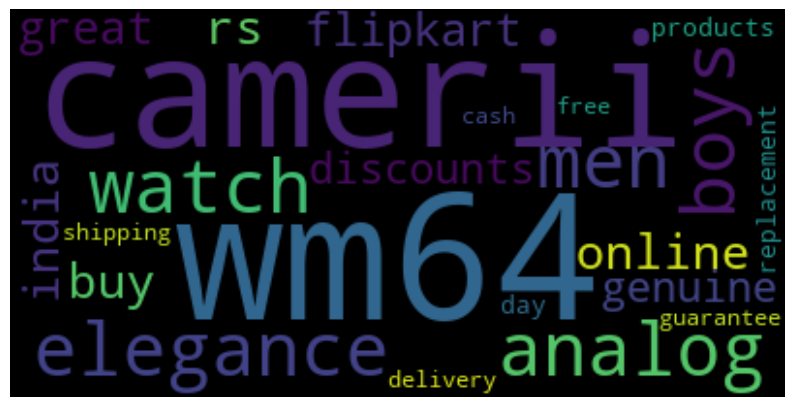

In [26]:
# Start with one review:
text = data.sentence_bow[6]

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
fig = plt.figure(figsize=(10, 15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

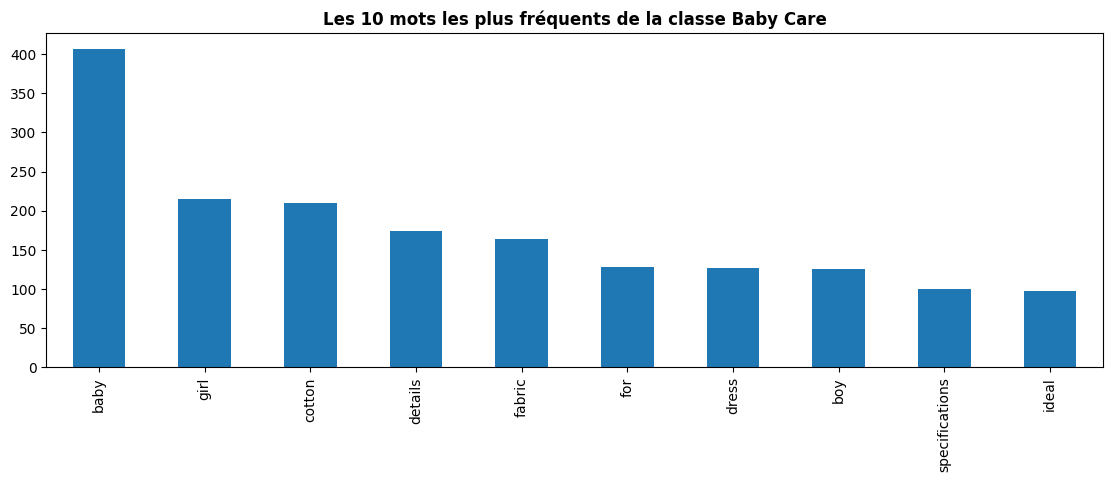

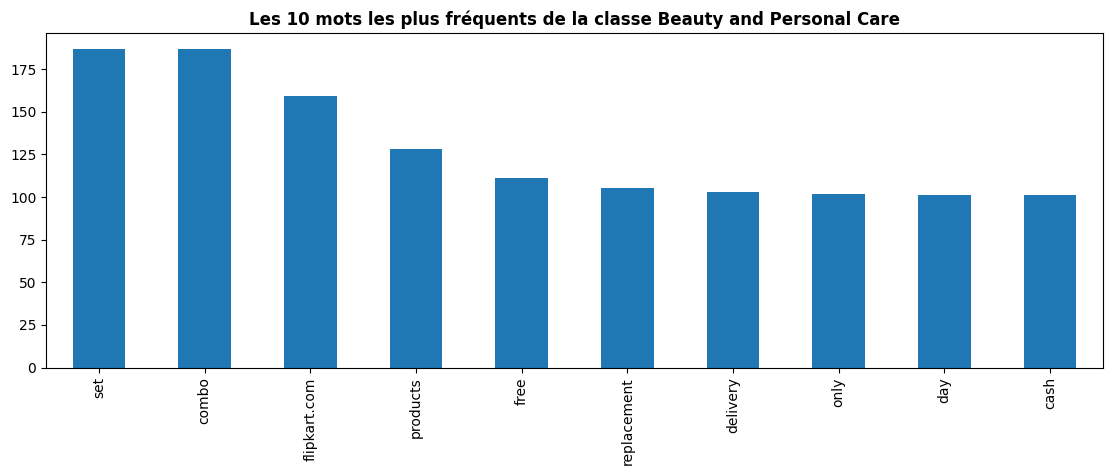

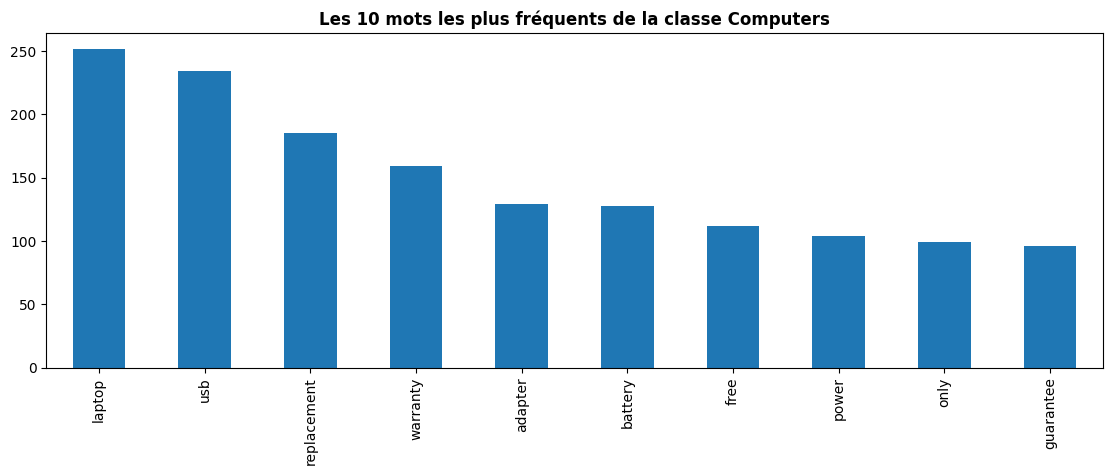

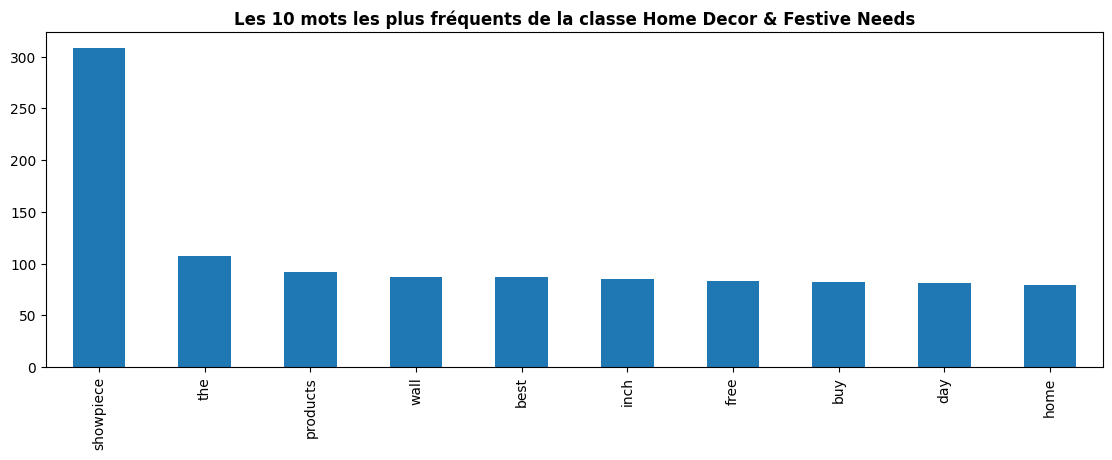

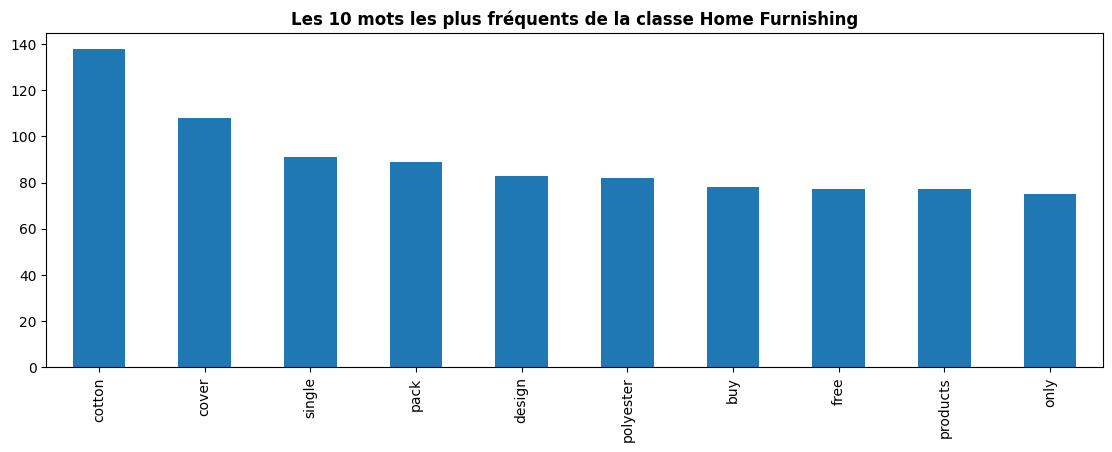

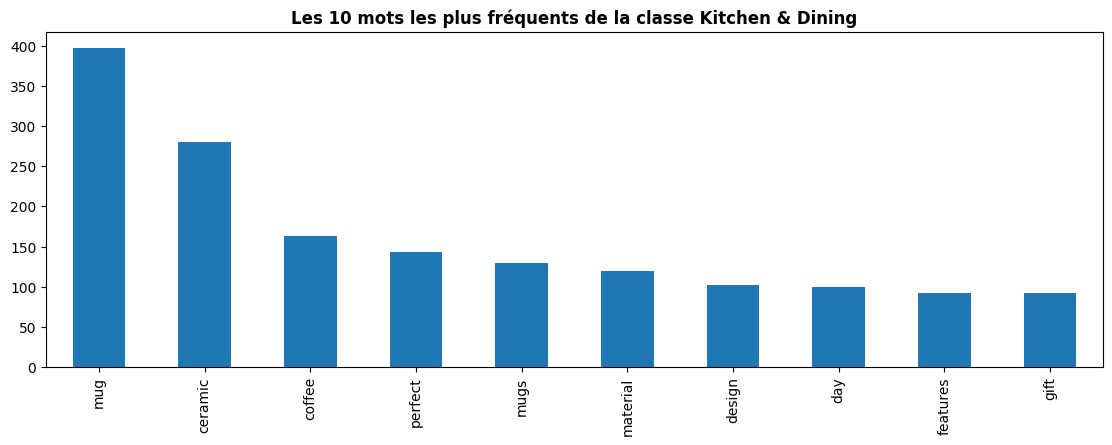

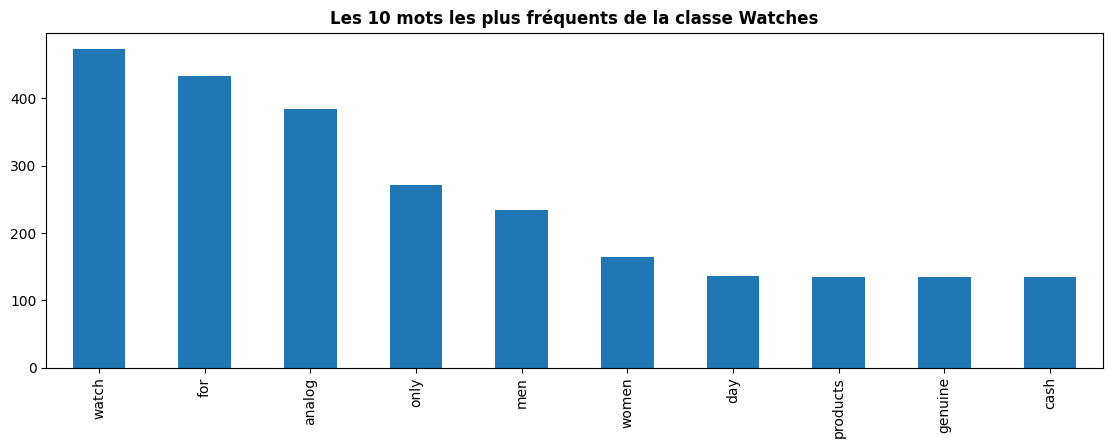

In [29]:
df =data.groupby(['categ_1'])['sentence_bow'].agg(lambda x : ' '.join(x))

for i in range(df.shape[0]):
    tokens = word_tokenize(df[i])
    # on compte la fréquence de chaque mot 
    freq_desc = pd.Series(FreqDist(tokens))

    fig = plt.figure(figsize=(30,20))
    ax = fig.add_subplot(4,2,i+1)
    freq_desc.sort_values(ascending=False)[0:10].plot.bar(ax=ax)
    ax.set_title("Les 10 mots les plus fréquents de la classe {}".format(df.index[i]), fontweight='bold')
    
plt.show()

Pour certaines catégories, les termes fréquemment utilisés sont fortement liés à ces catégories, Cependant, d’autres catégories comme ‘Beauty and Personal Care’ ont des mots fréquents qui sont moins caractéristiques.

In [22]:
# phrase ou un court texte d'exemple, pour illustrer la bonne réalisation des 5 étapes précédentes.
text

'camerii wm64 elegance analog watch for men boys camerii wm64 elegance analog watch for men boys buy camerii wm64 elegance analog watch for men boys wm64 online rs.449 india only flipkart.com great discounts only genuine products day replacement guarantee free shipping cash delivery'

In [23]:
l_categ = list(set(data['categ_1']))
print("catégories : ", l_categ)
y_cat_num = [(1-l_categ.index(data.iloc[i]['categ_1'])) for i in range(len(data))]

catégories :  ['Baby Care', 'Home Furnishing', 'Computers', 'Home Decor & Festive Needs', 'Beauty and Personal Care', 'Watches', 'Kitchen & Dining']


In [24]:
data['length_bow'] = data['sentence_bow'].apply(
    lambda x: len(word_tokenize(x)))
print("max length bow : ", data['length_bow'].max())
data['length_bow_lem'] = data['sentence_bow_lem'].apply(
    lambda x: len(word_tokenize(x)))
print("max length bow lem: ", data['length_bow_lem'].max())
data['length_dl'] = data['sentence_dl'].apply(lambda x: len(word_tokenize(x)))
print("max length dl : ", data['length_dl'].max())

max length bow :  384
max length bow lem:  384
max length dl :  637


In [25]:
# Calcul Tsne, détermination des clusters et calcul ARI entre vrais catégorie et n° de clusters


def ARI_fct(features):
    time1 = time.time()
    num_labels = len(l_categ)
    tsne = manifold.TSNE(n_components=2, perplexity=30, n_iter=2000,
                         init='random', learning_rate=200, random_state=42)
    X_tsne = tsne.fit_transform(features)

    # Détermination des clusters à partir des données après Tsne
    cls = cluster.KMeans(n_clusters=num_labels, n_init=100, random_state=42)
    cls.fit(X_tsne)
    ARI = np.round(metrics.adjusted_rand_score(y_cat_num, cls.labels_), 4)
    time2 = np.round(time.time() - time1, 0)
    print("ARI : ", ARI, "time : ", time2)

    return ARI, X_tsne, cls.labels_


# visualisation du Tsne selon les vraies catégories et selon les clusters
def TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI):
    fig = plt.figure(figsize=(15, 6))

    ax = fig.add_subplot(121)
    scatter = ax.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_cat_num, cmap='Set1')
    ax.legend(handles=scatter.legend_elements()[
              0], labels=l_categ, loc="best", title="Categorie")
    plt.title('Représentation des descriptions-produits par catégories réelles')

    ax = fig.add_subplot(122)
    scatter = ax.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels, cmap='Set1')
    ax.legend(handles=scatter.legend_elements()[0], labels=set(
        labels), loc="best", title="Clusters")
    plt.title('Représentation des descriptions-produits par clusters')

    plt.show()
    print("ARI : ", ARI)

# Features engeneering = encodage tf-idf + nettoyages supplementaires.

 Convertir une collection de documents bruts en une matrice de caractéristiques TF-IDF.
Équivalent à CountVectorizer suivi de TfidfTransformer.

## Bag of word - Tf-idf

### Préparation sentences

**Le bag of words** est une approche de modélisation de texte qui transforme un document ou une phrase en un ensemble de mots, sans tenir compte de l’ordre et se focalisant uniquement sur la fréquence de ces mots.

**CountVectorizer**convertit chaque texte en un vecteur de nombres entiers qui indiquent la fréquence de chaque mot dans le texte.

Les paramètres max_df et min_df servent à filtrer les mots pour la matrice de fréquence des termes créée par CountVectorizer. Concrètement, cela signifie que les mots apparaissant dans plus de 95% des textes ou dans moins de 1 texte seront exclus.

In [26]:
# création du bag of words (CountVectorizer )

cvect = CountVectorizer(stop_words='english', max_df=0.95, min_df=1)

feat = 'sentence_bow_lem'
cv_fit = cvect.fit(data[feat])


cv_transform = cvect.transform(data[feat])


In [27]:
cv_transform.shape

(1050, 5324)

### Exécution des modèles

In [28]:
print("CountVectorizer : ")
print("-----------------")
ARI, X_tsne, labels = ARI_fct(cv_transform)
print()


CountVectorizer : 
-----------------
ARI :  0.425 time :  29.0



### Graphiques

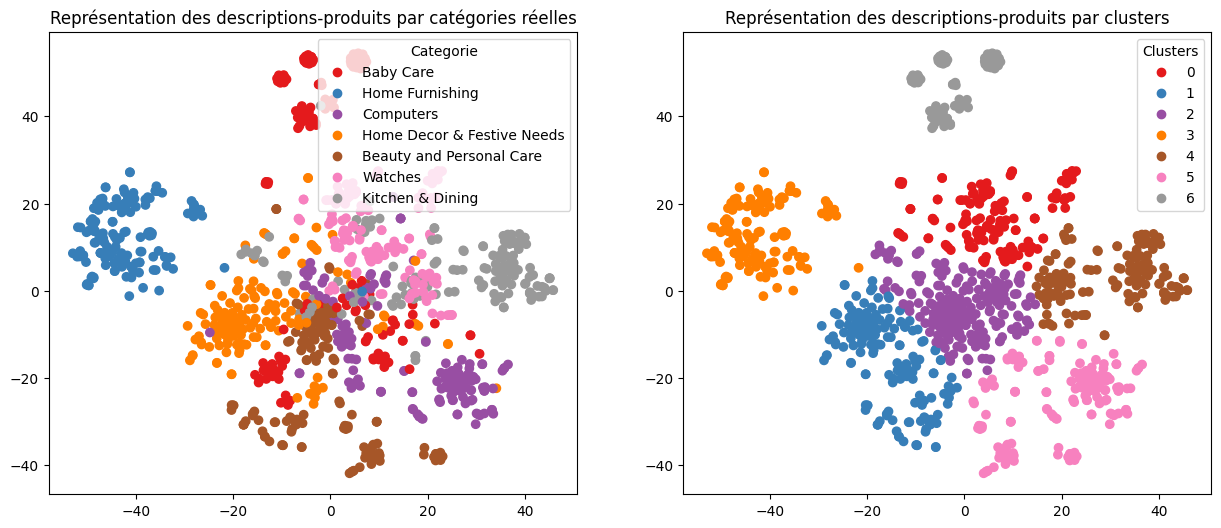

ARI :  0.425


In [29]:
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

Les clusters ont simplifié la séparation des catégories par rapport à leur représentation plus complexe dans la réalité. Certaines catégories, comme Home Decor & Festive Needs, Home Furnishing et Kitchen & Dining, se chevauchent davantage dans la réalité. D'autres clusters, tels que Watches, Beauty and Personal Care, et Baby Care, sont bien définis et correspondent aux catégories les plus distinctes dans la réalité.

L'ARI (Adjusted Rand Index) est un indice qui mesure la similarité entre deux groupements de données. Il corrige le Rand Index (RI), qui est une mesure de base de la similarité entre deux groupements, mais qui peut être influencé par le hasard. Dans ce cas, un ARI de 0.425 est considéré comme assez bon.

### acp

In [30]:
pca = PCA()
pca.fit(cv_transform.toarray())

PCA()

In [31]:
pca.explained_variance_ratio_.cumsum()

array([0.05418885, 0.10627052, 0.15011839, ..., 1.        , 1.        ,
       1.        ])

In [32]:
def eboulis(pca):
    '''Réalise un éboulis de valeurs propres'''
    scree = pca.explained_variance_ratio_*100
    scree_cum = scree.cumsum()
    
    plt.figure(figsize=(10,5))
    plt.bar(np.arange(len(scree)) + 1, scree)
    plt.plot(np.arange(len(scree)) + 1, scree_cum,c="red",marker='o')
    plt.xlabel("Rang de l'axe d'inertie")
    plt.ylabel("Pourcentage d'inertie")
    plt.title("Eboulis des valeurs propres")
    plt.show(block=False)

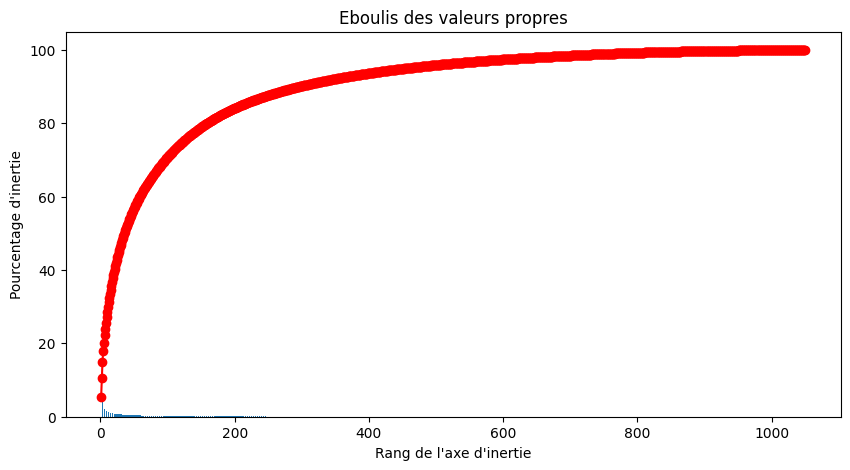

In [33]:
eboulis(pca)

Nous perdrions beaucoup d'information si nous décidions de n'utiliser que ces 2 premières composantes.

Nous allons donc réaliser une ACP afin de réduire nos dimensions puis ensuite réaliser un TSNE sur cette réduction.

La PCA (Analyse en Composantes Principales) permet de transformer les données initiales en nouvelles variables indépendantes les unes des autres et de réduire leur dimensionnalité, tout en conservant un niveau élevé de variance expliquée (99%). Cela entraîne une meilleure distinction des données lors de l'utilisation de T-SNE et réduit le temps de traitement nécessaire pour T-SNE.

In [34]:
print("Dimensions dataset avant réduction PCA : ", cv_transform.toarray().shape)
pca = PCA(n_components=0.99)
feat_pca= pca.fit_transform(cv_transform.toarray())
print("Dimensions dataset après réduction PCA : ", feat_pca.shape)

Dimensions dataset avant réduction PCA :  (1050, 5324)
Dimensions dataset après réduction PCA :  (1050, 759)


In [35]:
print("CountVectorizer : ")
print("-----------------")
ARI, X_tsne, labels = ARI_fct(feat_pca)
print()


CountVectorizer : 
-----------------
ARI :  0.4241 time :  29.0



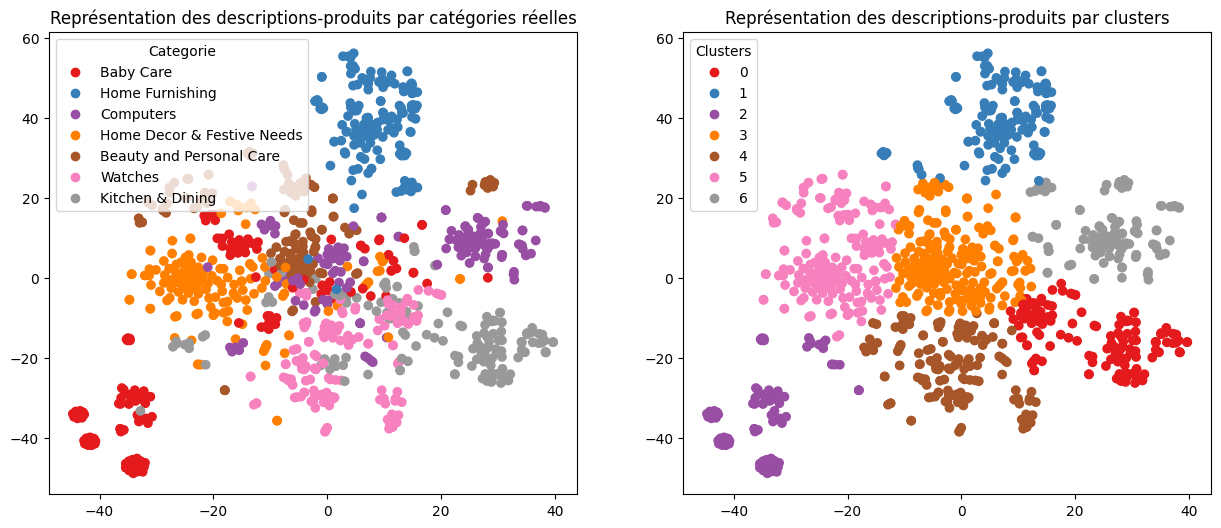

ARI :  0.4241


In [36]:
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

dégradation de l'ARI

## Tf-idf

Le Tf-idf, ou fréquence du terme - fréquence inverse du document, est une technique de traitement de texte qui évalue l'importance d'un terme dans un document par rapport à une collection de documents. Elle calcule la fréquence d'un terme dans un document et l'inverse de sa fréquence dans l'ensemble des documents. Ainsi, un terme fréquent dans un document mais rare dans la collection aura un poids Tf-idf élevé.

Les paramètres max_df et min_df dans CountVectorizer aident à déterminer quels mots inclure dans la matrice de fréquence des termes. Le paramètre max_df exclut les mots qui apparaissent dans plus de 95% des documents, tandis que min_df exclut ceux qui apparaissent dans moins de 1 document. Ces paramètres permettent de filtrer les mots trop communs ou trop rares pour la modélisation.

In [37]:
# création du bag of words df_cat
ctf = TfidfVectorizer(stop_words='english', max_df=0.95, min_df=1)
feat = 'sentence_bow_lem'
ctf_fit = ctf.fit(data[feat])
ctf_transform = ctf.transform(data[feat])

In [38]:
ctf_transform.shape

(1050, 5324)

In [39]:
print("Tf-idf : ")
print("--------")
ARI, X_tsne, labels = ARI_fct(ctf_transform)

Tf-idf : 
--------
ARI :  0.5807 time :  27.0


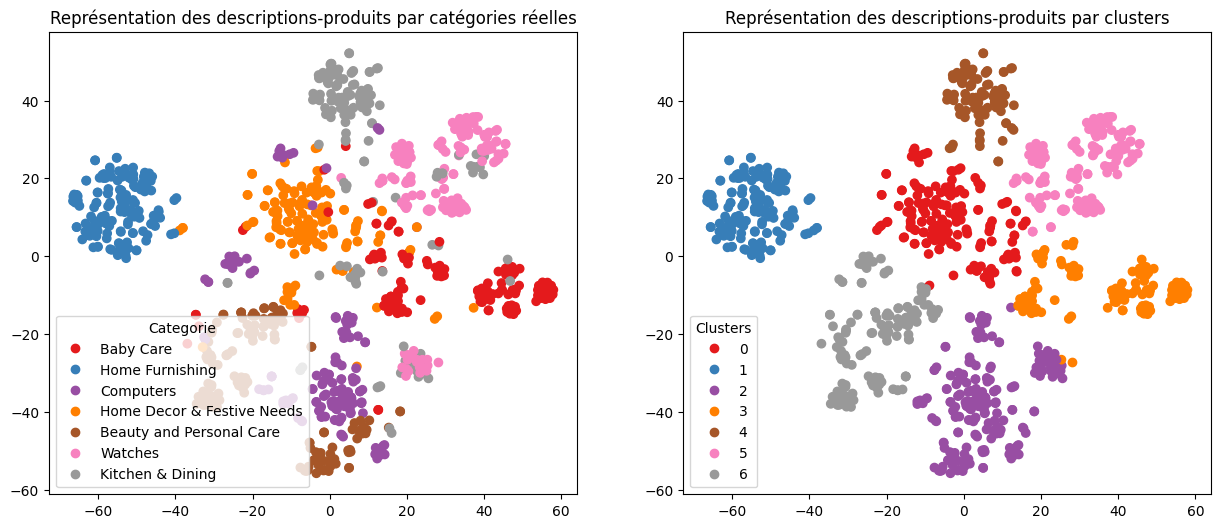

ARI :  0.5807


In [40]:
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

On constate cependant toujours que les clusters ont séparé les différentes catégories de manière plus simplifiée que leur représentation réelle. La plupart des catégories se mélangent plus dans la représentation réelle. D'autres clusters semblent un peu mieux déterminés, ce sont les catégories qui semblent les plus espacées dans la représentation réelle comme Watches.

### ACP

In [41]:
pca = PCA()
pca.fit(ctf_transform.toarray())

PCA()

In [42]:
pca.explained_variance_ratio_.cumsum()


array([0.02640168, 0.04746665, 0.06546804, ..., 1.        , 1.        ,
       1.        ])

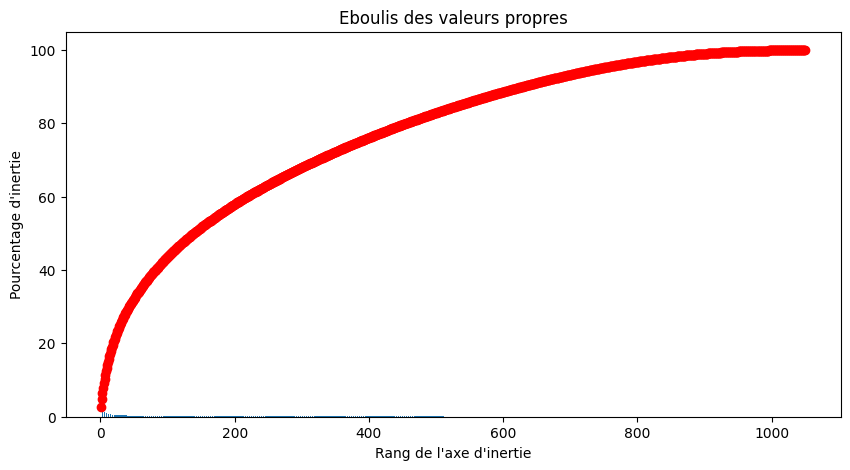

In [43]:
eboulis(pca)

In [44]:
print("Dimensions dataset avant réduction PCA : ", ctf_transform.toarray().shape)
pca = PCA(n_components=0.99)
feat_pca= pca.fit_transform(ctf_transform.toarray())
print("Dimensions dataset après réduction PCA : ", feat_pca.shape)

Dimensions dataset avant réduction PCA :  (1050, 5324)
Dimensions dataset après réduction PCA :  (1050, 900)


In [45]:
print("Tf-idf : ")
print("--------")
ARI, X_tsne, labels = ARI_fct(feat_pca)

Tf-idf : 
--------
ARI :  0.4905 time :  27.0


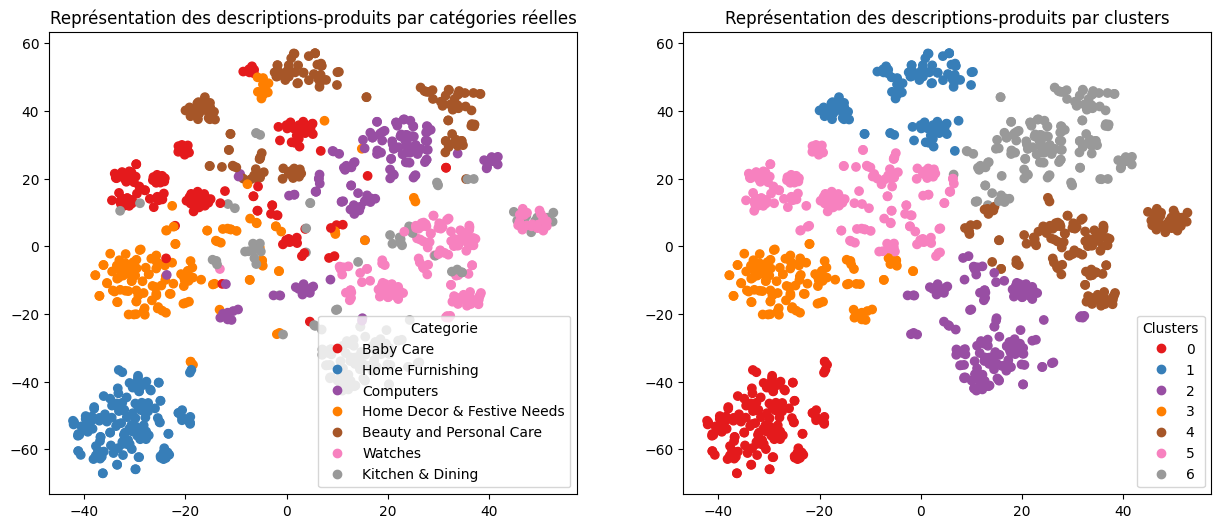

ARI :  0.4905


In [46]:
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

dégradation de l'ARI (0.4905) après avoir effectué une réduction de dimension via ACP.

# Méthodes de word/sentence embedding Word2Vec , BERT, et USE (Universal Sentence Encoder))

## word2vec

word2vec utilise un réseau neuronal pour prédire les mots cibles dans les phrases et prend le coefficient de la dernière couche du réseau neuronal comme éléments du vecteur de mots.



In [47]:
import tensorflow as tf
import tensorflow.keras
from tensorflow import keras
from tensorflow.keras import backend as K

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import metrics as kmetrics
from tensorflow.keras import layers
from tensorflow.keras.layers import Input, Embedding, GlobalAveragePooling1D
from tensorflow.keras.models import Model
import gensim
from keras.applications.vgg16 import preprocess_input

In [48]:
descriptions = data['sentence_bow_lem'].to_list()
descriptions = [gensim.utils.simple_preprocess(text) for text in descriptions]

In [49]:
# Déterminer les paramètres
w2v_size=300
w2v_window=5
w2v_min_count=1
w2v_epochs=100
maxlen = 380

In [50]:
print("Création et entraînement du modèle Word2Vec.")
w2v_model = gensim.models.Word2Vec(min_count=w2v_min_count,
                               window=w2v_window,
                               vector_size=w2v_size,
                               seed=0)


w2v_model.build_vocab(descriptions)
w2v_model.train(descriptions, total_examples=w2v_model.corpus_count, epochs=w2v_epochs)
w2v_words = w2v_model.wv.index_to_key
print("Taille du vocabulaire :", len(w2v_words))
print("Word2Vec entrainé.")

Création et entraînement du modèle Word2Vec.
Taille du vocabulaire : 4712
Word2Vec entrainé.


In [51]:
print("Préparation des descriptions")
tokenizer = keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(descriptions)
x_sentences = keras.preprocessing.sequence.pad_sequences(tokenizer.texts_to_sequences(descriptions), maxlen=maxlen, padding='post')
                                                   
num_words = len(tokenizer.word_index) + 1
print("Number of unique words: ", num_words)

Préparation des descriptions
Number of unique words:  4713


In [52]:
print("Création de la matrice d'embedding")
word_index = tokenizer.word_index
vocab_size = len(word_index) + 1
embedding_matrix = np.zeros((vocab_size, w2v_size))
i=0
j=0
    
for word, idx in word_index.items():
    i +=1
    if word in w2v_words:
        j +=1
        embedding_vector = w2v_model.wv[word]
        if embedding_vector is not None:
            embedding_matrix[idx] = w2v_model.wv[word]
            
word_rate = np.round(j/i,4)
print("Word embedding rate : ", word_rate)
print("Embedding matrix: %s" % str(embedding_matrix.shape))

Création de la matrice d'embedding
Word embedding rate :  1.0
Embedding matrix: (4713, 300)


In [53]:
# Création du modèle

input=keras.layers.Input(shape=(len(x_sentences),maxlen),dtype='float64')
word_input=word_input=keras.layers.Input(shape=(maxlen,),dtype='float64')  
word_embedding=keras.layers.Embedding(input_dim=vocab_size, output_dim=w2v_size, embeddings_initializer = keras.initializers.Constant(embedding_matrix))(word_input)
word_vec=keras.layers.GlobalAveragePooling1D()(word_embedding)  
embed_model = keras.models.Model([word_input],word_vec)

embed_model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 380)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding (Embedding)                │ (None, 380, 300)            │       1,413,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d             │ (None, 300)                 │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,413,900 (5.39 MB)

 Trainable params: 1,413,900 (5.39 MB)

 Non-trainable params: 0 (0.00 B)

In [54]:
embeddings = embed_model.predict(x_sentences)
embeddings.shape

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


(1050, 300)

In [55]:
ARI, X_tsne, labels = ARI_fct(embeddings)

ARI :  0.3344 time :  34.0


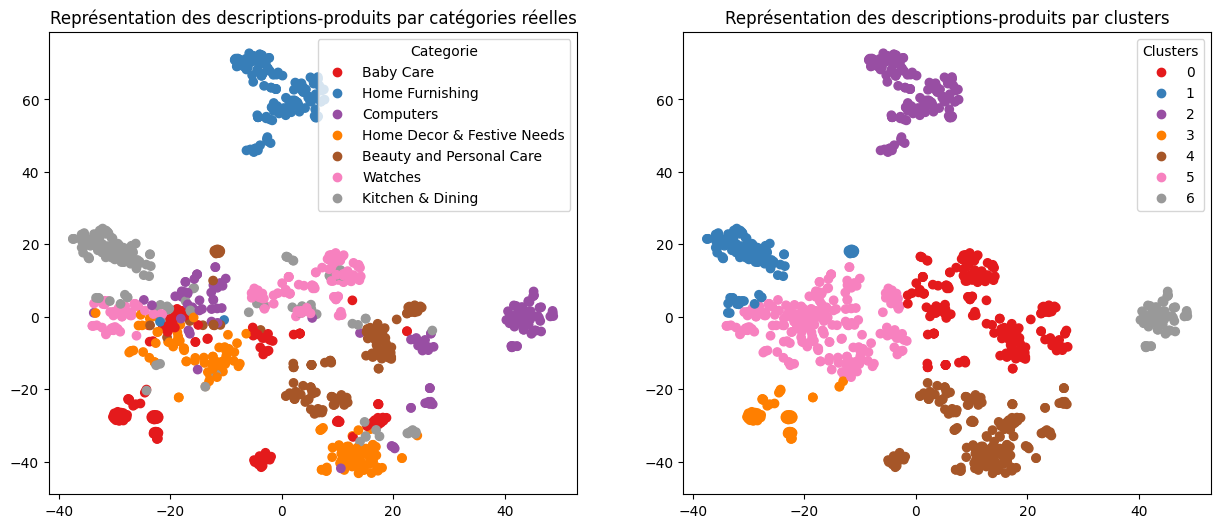

ARI :  0.3344


In [56]:
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

### ACP

In [57]:
pca = PCA()
pca.fit(embeddings)

PCA()

In [58]:
print("Dimensions dataset avant réduction PCA : ", embeddings.shape)
pca = PCA(n_components=0.99)
feat_pca= pca.fit_transform(embeddings)
print("Dimensions dataset après réduction PCA : ", feat_pca.shape)

Dimensions dataset avant réduction PCA :  (1050, 300)
Dimensions dataset après réduction PCA :  (1050, 54)


In [59]:
ARI, X_tsne, labels = ARI_fct(feat_pca)

ARI :  0.3372 time :  33.0


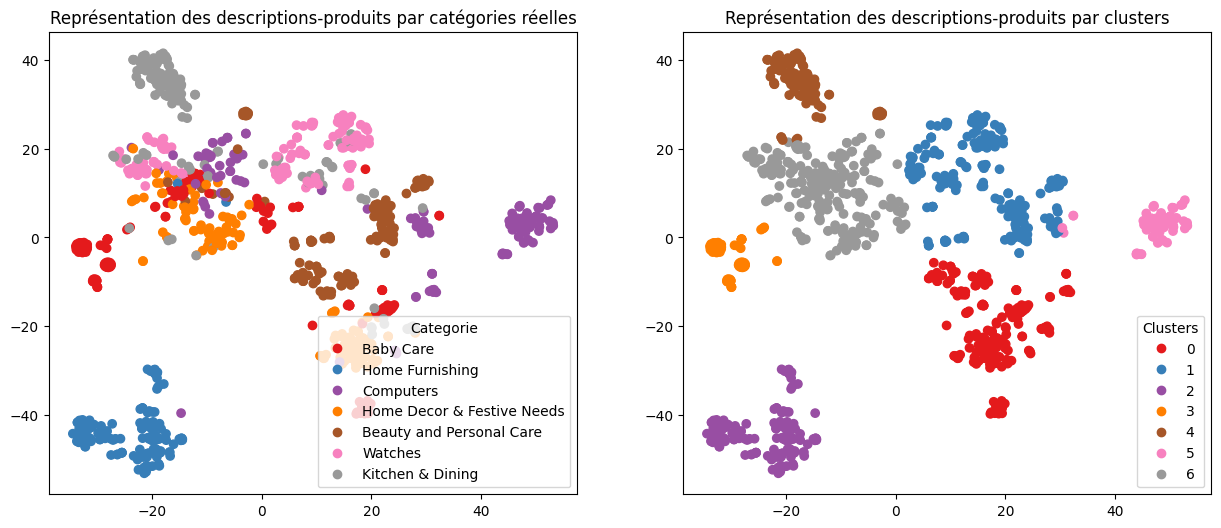

ARI :  0.3372


In [60]:
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

## BERT Tensorflow Hub

Le modèle BERT TensorFlow Hub est un modèle de traitement du langage naturel basé sur BERT et développé par Google. TensorFlow Hub est une bibliothèque open source de modèles de machine learning pré-entraînés développée par Google et fournit une interface simple pour utiliser des modèles pré-entraînés pour des tâches de machine learning.

In [75]:
model_url = 'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4'
bert_layer = hub.KerasLayer(model_url, trainable=True)
descriptions = data['sentence_dl'].to_list()

In [76]:
batch_size = 10
model_type = 'bert-base-uncased'
model = bert_layer

features_bert_tfh, last_hidden_states_tot_tfh = feature_BERT_fct(model, model_type, descriptions, 
                                                                 batch_size, mode='TFhub')

temps traitement :  652.0


In [77]:
ARI, X_tsne, labels = ARI_fct(features_bert_tfh)

ARI :  0.3072 time :  35.0


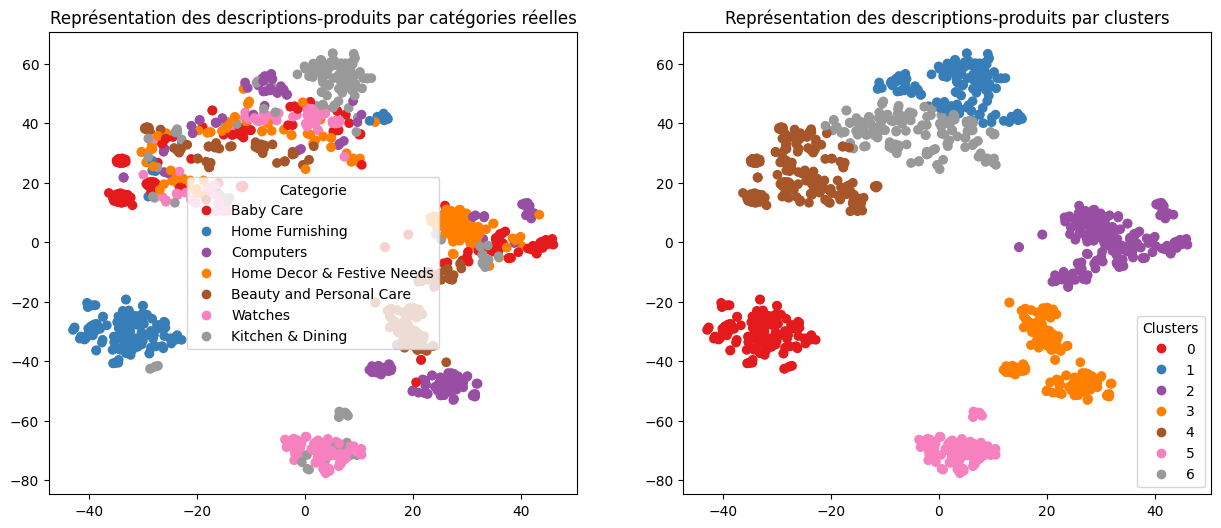

ARI :  0.3072


In [78]:
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

Ici nous obtenons un ARI à 0.3072

### acp

In [79]:
pca = PCA()
pca.fit(features_bert_tfh)

PCA()

In [80]:
print("Dimensions dataset avant réduction PCA : ", features_bert_tfh.shape)
pca = PCA(n_components=0.99)
feat_pca_tfh = pca.fit_transform(features_bert_tfh)
print("Dimensions dataset après réduction PCA : ", feat_pca_tfh.shape)

Dimensions dataset avant réduction PCA :  (1050, 768)
Dimensions dataset après réduction PCA :  (1050, 279)


In [81]:
ARI, X_tsne, labels = ARI_fct(feat_pca_tfh)

ARI :  0.3116 time :  34.0


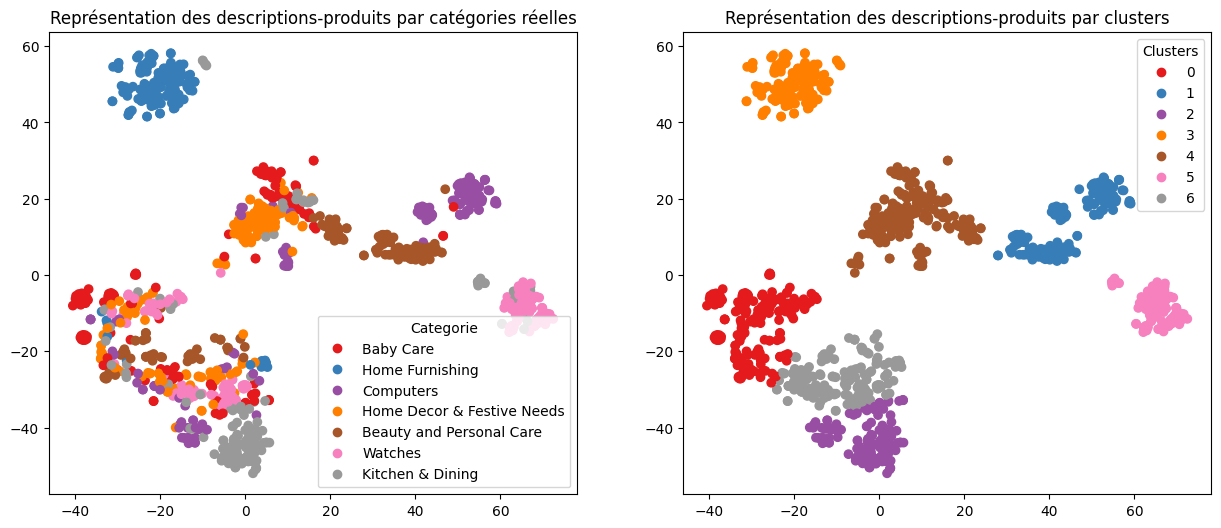

ARI :  0.3116


In [82]:
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

## USE : Universal Sentence Encoder

USE (Universal Sentence Encoder) est un modèle de traitement du langage naturel développé par Google. Il permet de convertir des phrases en vecteurs de nombre réels, également appelés embeddings, qui capturent le sens sémantique de la phrase. Le modèle est entraîné sur un grand corpus de texte en plusieurs langues et est capable de comprendre les nuances sémantiques et contextuelles des phrases dans différentes langues.

In [66]:
def feature_USE_fct(descriptions, batch_size):
    time1 = time.time()

    for step in range(len(descriptions)//batch_size) :
        idx = step*batch_size
        feat = embed(descriptions[idx:idx+batch_size])

        if step ==0 :
            features = feat
        else :
            features = np.concatenate((features,feat))

    time2 = np.round(time.time() - time1,0)
    return features

In [68]:
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")
descriptions = data['sentence_dl'].to_list()
batch_size = 10

In [69]:
features_USE = feature_USE_fct(descriptions, batch_size)

In [70]:
ARI, X_tsne, labels = ARI_fct(features_USE)

ARI :  0.4083 time :  33.0


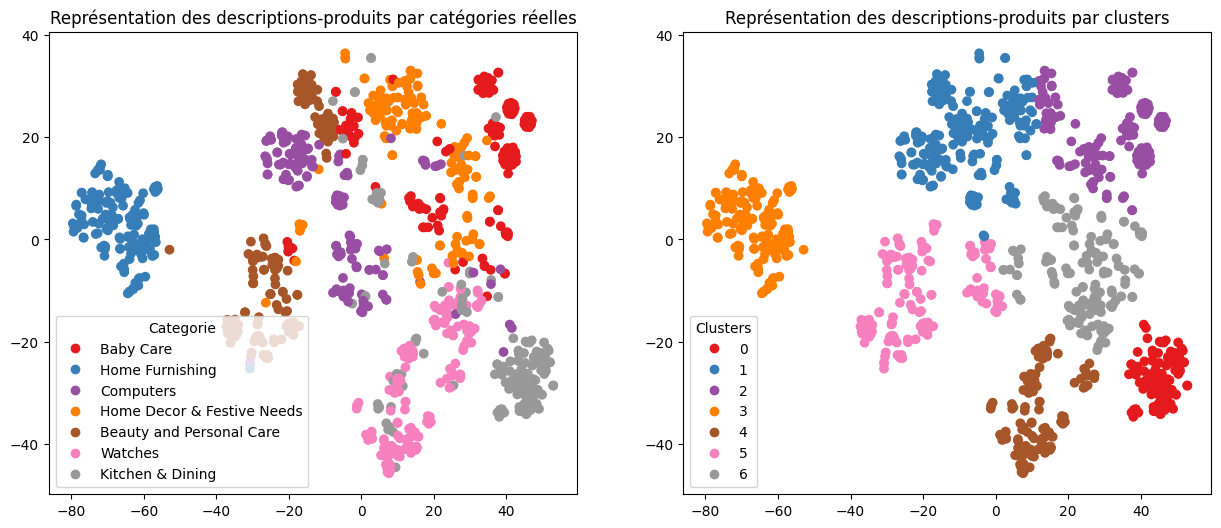

ARI :  0.4083


In [71]:
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

### acp

In [ ]:
pca = PCA()
pca.fit(features_bert)

In [72]:
print("Dimensions dataset avant réduction PCA : ", features_USE.shape)
pca = PCA(n_components=0.99)
feat_pca_use = pca.fit_transform(features_USE)
print("Dimensions dataset après réduction PCA : ", feat_pca_use.shape)

Dimensions dataset avant réduction PCA :  (1050, 512)
Dimensions dataset après réduction PCA :  (1050, 338)


In [73]:
ARI, X_tsne, labels = ARI_fct(feat_pca_use)

ARI :  0.3948 time :  33.0


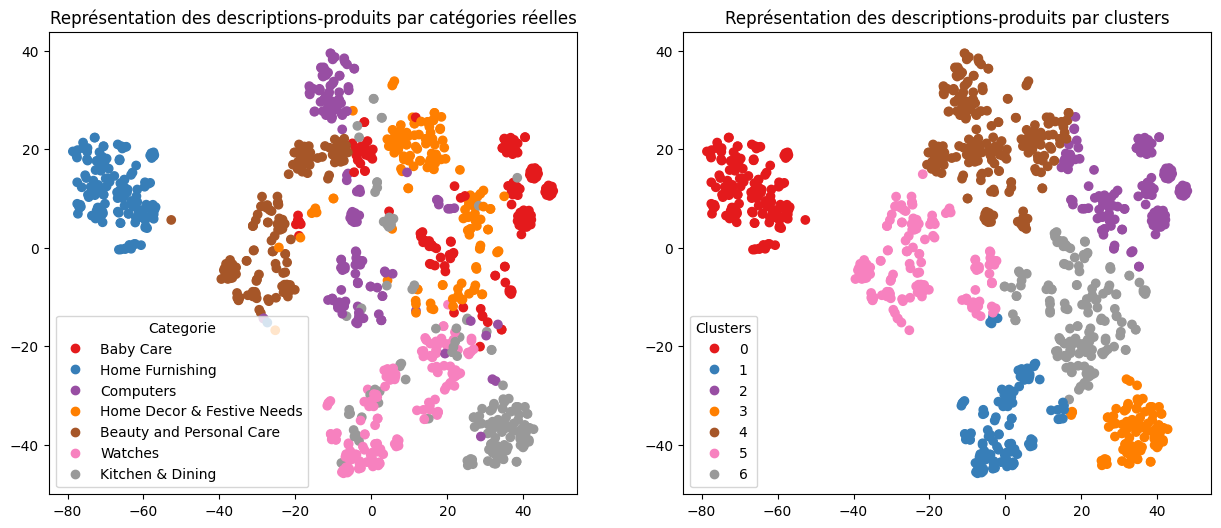

ARI :  0.3948


In [74]:
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)